In [1]:
import random

import numpy as np
import matplotlib.pyplot as plt

from collections import defaultdict
from matplotlib.patches import Rectangle

In [2]:
strike_zone = (17, 24)

def is_strike(x, y) -> bool:
    return abs(x) <= 8.5 and abs(y) <= 12

In [3]:
def get_zone_ranges(width_zones, height_zones):
    width, height = strike_zone
    
    width_start = -1 * (width / 2)
    width_zone_length = width / width_zones

    height_start = -1 * (height / 2)
    height_zone_length = height / height_zones

    return [
        (round(x1, 3), round(x2, 3))
        for x1 in [ width_start + (i * width_zone_length) for i in range(width_zones) ]
        for x2 in reversed([ height_start + (i * height_zone_length) for i in range(height_zones) ])
    ], width_zone_length, height_zone_length

def label_zones(zones):
    return [
        (i + 1, zone)
        for i, zone in enumerate(zones)
    ]

def is_in_zone(x, y, zone, zone_width, zone_height):
    zone_x, zone_y = zone
    return (x >= zone_x and x < round(zone_x + zone_width, 3)) and (y >= zone_y and y < round(zone_y + zone_height, 3))

def find_zone(x, y, zones_with_labels, zone_width, zone_height):
    for item in zones_with_labels:
        _, zone = item
        if is_in_zone(x, y, zone, zone_width, zone_height):
            return item

    return None

In [4]:
n_width_zones = 5
n_height_zones = 5

zones, zone_width, zone_height = get_zone_ranges(n_width_zones, n_height_zones)
zones_with_labels = label_zones(zones)

In [5]:
def is_strike(x, y) -> bool:
    return abs(x) <= 8.5 and abs(y) <= 12

def get_strike_zone_percentage_by_pitch_type(pitches: list, pitch_type: str) -> float:
    pitch_mappings = defaultdict(lambda: { 'strikes': 0, 'total': 0 })
    for pt, x, y in pitches:
        pitch_mappings[pt]['strikes'] += int(is_strike(x, y))
        pitch_mappings[pt]['total'] += 1

    observation = pitch_mappings[pitch_type]
    return round(0.0 if observation['strikes'] == 0 else (observation['strikes'] / observation['total']), 3)

get_strike_zone_percentage_by_pitch_type([
    ['FB', 2.2, -5.8],
    ['SL', 3, 5],
    ['FB', 8.5, -5.8],
    ['FB', -8.5, -5.8],
    ['FB', -8.55, -5.8],
], 'FB')

0.75

In [6]:
possible_x = np.linspace(-13, 13, 1000).tolist()
possible_y = np.linspace(-18, 18, 1000).tolist()

def generate_pitch():
    return (
        random.choice(possible_x),
        random.choice(possible_y),
    )

pitch_sequence = [
    ['FB', *loc]
    for loc in ( generate_pitch() for _ in range(15) )
]

strikes = list(filter(lambda a: is_strike(a[1], a[2]), pitch_sequence))
balls = list(filter(lambda a: not is_strike(a[1], a[2]), pitch_sequence))

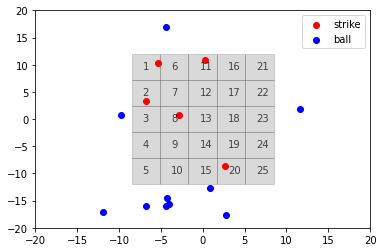

perc of strikes: 0.333


In [7]:
fig, ax = plt.subplots()

for label, zone in zones_with_labels:
    x1, x2 = zone
    ax.add_patch(
        Rectangle(
            (x1, x2),
            zone_width,
            zone_height,
            alpha=0.15,
            facecolor='k',
            edgecolor='k',
            linewidth=1
        )
    )

    offset_x = (zone_width/2) - .4
    offset_y = (zone_height/2) - .4
    ax.annotate(label, xy=(x1 + offset_x, x2 + offset_y), alpha=.7)

ax.scatter([ row[1] for row in strikes ], [ row[2] for row in strikes ], c='r', label='strike')
ax.scatter([ row[1] for row in balls ], [ row[2] for row in balls ], c='b', label='ball')

plt.xlim(-20, 20)
plt.ylim(-20, 20)

plt.legend()
plt.show()

print(
    'perc of strikes:',
    get_strike_zone_percentage_by_pitch_type(pitch_sequence, 'FB')
)

In [8]:
cluster_strikes_by_zone = [
    ((x, y), find_zone(x, y, zones_with_labels, zone_width, zone_height)[0])
    for _, x, y
    in strikes
]

cluster_strikes_by_zone

[((0.2212212212212208, 10.82882882882883), 11),
 ((-2.8758758758758756, 0.6666666666666679), 8),
 ((-5.4004004004004, 10.396396396396398), 1),
 ((-6.727727727727728, 3.261261261261261), 2),
 ((2.6156156156156154, -8.63063063063063), 20)]